## What is the optimal length of a van to reduce the overall drag?

Assume that vehicle is a box, with length $x$, width $y$, and height $z$. The expected volume is $V=xyz=20m^3$. 

The aerodynamic drag is $130N$ per $m^2$ of frontal area:

$$ J_1 = 130 A $$

or 

$$ J_1 = \frac{2600}{p} $$

Meanwhile, the weight of the vehicle can be estimated as proportional to the surface area, leading to rolling friction:

$$ J_2 = \frac{50}{p} + 100\sqrt(p) $$

Together, this gives us

$$ J = J_1 + J_2 = \frac{2650}{p} + 100\sqrt{p} $$

This function drag is implemented here:

In [2]:
def J(p):
    return 2050/p+100*p**0.5

Note that the def keyword is not very flexible, and it may be preferable to define the function using the anonymous lambda expression, especially if the function has external variables:

In [8]:
func = lambda p : 2050/p+100*p**0.5

First, we want to plot this function. 

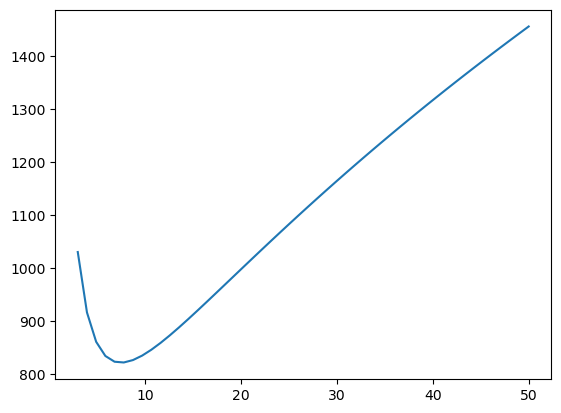

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import minimize

ps = np.linspace(3,50)
Js = J(ps)
plt.plot(ps,Js)

Now we can use a minimisation alogrithm to find the exact minimum:

In [11]:
pstar = minimize(J,[5])
print(pstar)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 821.0555512197643
        x: [ 7.490e+00]
      nit: 7
      jac: [ 0.000e+00]
 hess_inv: [[ 1.366e-01]]
     nfev: 16
     njev: 8


J(sym.Symbol("p"))

In [25]:
p=sym.Symbol("p")
Jp=J(p)
Jp

200*p**0.5 + 2050/p

In [23]:
Jp1=sym.diff(Jp,p)
Jp1

100.0/p**0.5 - 2050/p**2

In [27]:
sym.solve(Jp1,p)

[7.49035797987545]

In [ ]:
Jp2=sym.diff(Jp1,p)
Jp2

-50.0/p**1.5 + 4100/p**3